In [ ]:
%%capture
!pip install skimpy
!python -m pip install -U skorch


In [ ]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
from skimpy import skim
from wordcloud import WordCloud, STOPWORDS

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
%cd /content/drive/My Drive/Colab Notebooks/Uas NLP

/content/drive/My Drive/Colab Notebooks/Uas NLP


In [ ]:
%ls

 cleantweet.csv  'UAS_NLP_2101010074_2101010097_2101010090(1).ipynb'   UasNLP.ipynb
 Fake.csv         UAS_NLP_2101010074_2101010097_2101010090.ipynb       Untitled0.ipynb
 True.csv         uasnlp.ipynb


# **Reading a text-based dataset into pandas** **bold text**

In [ ]:
df = pd.read_csv("/content/drive/My Drive/Colab Notebooks/Uas NLP/cleantweet.csv")
df.head(10)

,Unnamed: 0,text,sentiment
0,0,text,0
1,1,rising cases of covid does not alarm me rising...,1
2,2,please vote for chicagoindiaresolution marking...,0
3,3,wishing all of you eidaladha hazrat ibrahim as...,1
4,4,daily coronavirus cases in india top for first...,1
5,5,sitting here india style watching the raindrop...,0
6,6,who out there believes that if china and india...,1
7,7,very happy with the new education policy imple...,1
8,8,india development partnership does not come wi...,0
9,9,hon prime minister india how the new education...,1


# **3. Exploratory Data Analysis (EDA)**

In [ ]:
df.groupby('sentiment').describe()

Unnamed: 0                                                     \
               count          mean           std  min      25%      50%   
sentiment                                                                 
0            65672.0  56865.211521  38179.470881  0.0  26180.5  49388.0   
1            68676.0  77030.887166  36739.452229  1.0  51621.5  84710.5   

                                
                 75%       max  
sentiment                       
0           79255.00  134347.0  
1          105452.25  134344.0

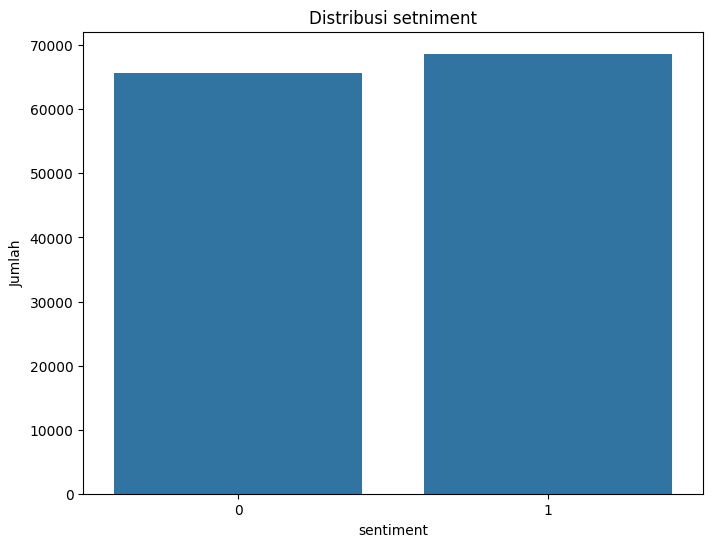

In [ ]:
# Distribusi label
plt.figure(figsize=(8, 6))
sns.countplot(x='sentiment', data=df)
plt.title('Distribusi setniment')
plt.xlabel('sentiment')
plt.ylabel('Jumlah')
plt.show()

Dalam grafik di atas Kita mempunyai 68676 data tidak deppresive (1) dan 65672 data deppresive (0)

In [ ]:
skim(df)

╭──────────────────────────────────────────────── skimpy summary ─────────────────────────────────────────────────╮
│          Data Summary                Data Types                                                                 │
│ ┏━━━━━━━━━━━━━━━━━━━┳━━━━━━━━┓ ┏━━━━━━━━━━━━━┳━━━━━━━┓                                                          │
│ ┃ dataframe         ┃ Values ┃ ┃ Column Type ┃ Count ┃                                                          │
│ ┡━━━━━━━━━━━━━━━━━━━╇━━━━━━━━┩ ┡━━━━━━━━━━━━━╇━━━━━━━┩                                                          │
│ │ Number of rows    │ 134348 │ │ int64       │ 2     │                                                          │
│ │ Number of columns │ 3      │ │ string      │ 1     │                                                          │
│ └───────────────────┴────────┘ └─────────────┴───────┘                                                          │
│                                                     number                                                      │
│ ┏━━━━━━━━━━━━━━━━┳━━━━━┳━━━━━━━━┳━━━━━━━━━━┳━━━━━━━━━━┳━━━━━┳━━━━━━━━━┳━━━━━━━━┳━━━━━━━━━┳━━━━━━━━━┳━━━━━━━━━┓  │
│ ┃ column_name    ┃ NA  ┃ NA %   ┃ mean     ┃ sd       ┃ p0  ┃ p25     ┃ p50    ┃ p75     ┃ p100    ┃ hist    ┃  │
│ ┡━━━━━━━━━━━━━━━━╇━━━━━╇━━━━━━━━╇━━━━━━━━━━╇━━━━━━━━━━╇━━━━━╇━━━━━━━━━╇━━━━━━━━╇━━━━━━━━━╇━━━━━━━━━╇━━━━━━━━━┩  │
│ │ Unnamed: 0     │   0 │      0 │    67170 │    38780 │   0 │   33590 │  67170 │  100800 │  134300 │ ▇▇▇▇▇▇  │  │
│ │ sentiment      │   0 │      0 │   0.5112 │   0.4999 │   0 │       0 │      1 │       1 │       1 │ ▇    ▇  │  │
│ └────────────────┴─────┴────────┴──────────┴──────────┴─────┴─────────┴────────┴─────────┴─────────┴─────────┘  │
│                                                     string                                                      │
│ ┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━┓  │
│ ┃ column_name               ┃ NA      ┃ NA %       ┃ words per row                ┃ total words              ┃  │
│ ┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━┩  │
│ │ text                      │      18 │       0.01 │                           25 │                  3361643 │  │
│ └───────────────────────────┴─────────┴────────────┴──────────────────────────────┴──────────────────────────┘  │
╰────────────────────────────────────────────────────── End ──────────────────────────────────────────────────────╯

Analisis menggunakan Data Analyzer

Statistik deskriptif yang ditampilkan untuk setiap kolom meliputi:

1. mean: Rata-rata nilai dalam kolom
2. sd: Standar deviasi nilai dalam kolom
3. p25: Quantile ke-25 nilai dalam kolom
4. p50: Median nilai dalam kolom
5. p75: Quantile ke-75 nilai dalam kolom
6. p108: Quantile ke-108 nilai dalam kolom
7. hist: Histogram nilai dalam kolom

In [ ]:
df.isnull().sum() #Melihat Untuk Data yang Null Values

Unnamed: 0     0
text          18
sentiment      0
dtype: int64

TERDAPAT 18 TEXT YANG BERISI NULL VALUES

In [ ]:
df.dropna(inplace=True) #Menghapus yang Null

MELAKUKAN DROP PADA DATA YANG BERISI NULL

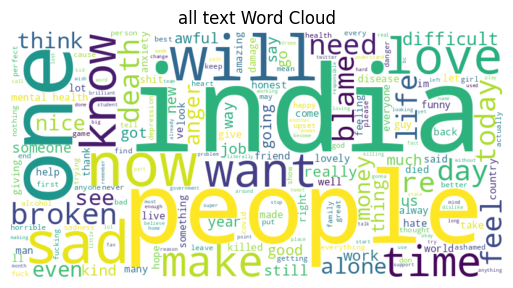

In [ ]:
all_text = " ".join(df['text'])

# Generate word clouds for spam and ham messages
text_wordcloud = WordCloud(width=800, height=400, background_color='white').generate(all_text)

# Plot word clouds
plt.figure(figsize=(14, 7))
plt.subplot(1, 2, 1)
plt.imshow(text_wordcloud, interpolation='bilinear')
plt.title('all text Word Cloud')
plt.axis('off')

plt.show()

KATA KATA YANG SERING MUNCUL


In [ ]:
df.info()

df.head()

<class 'pandas.core.frame.DataFrame'>
Index: 134330 entries, 0 to 134347
Data columns (total 3 columns):
 #   Column      Non-Null Count   Dtype 
---  ------      --------------   ----- 
 0   Unnamed: 0  134330 non-null  int64 
 1   text        134330 non-null  object
 2   sentiment   134330 non-null  int64 
dtypes: int64(2), object(1)
memory usage: 4.1+ MB


,Unnamed: 0,text,sentiment
0,0,text,0
1,1,rising cases of covid does not alarm me rising...,1
2,2,please vote for chicagoindiaresolution marking...,0
3,3,wishing all of you eidaladha hazrat ibrahim as...,1
4,4,daily coronavirus cases in india top for first...,1


Melihat Struktur Dari Data

In [ ]:
df.isnull().sum()

Unnamed: 0    0
text          0
sentiment     0
dtype: int64

Melihat Jumlah Data Yang Null yang dimana data sudah tidak ada yang bernilai Null Values


# Text Cleaning & Machine Learning

In [ ]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
import re

In [ ]:
df = df.iloc[1:, 1:] #Melakukan Drop pada baris dan kolom pertama

In [ ]:
df.head(10)

,text,sentiment
1,rising cases of covid does not alarm me rising...,1
2,please vote for chicagoindiaresolution marking...,0
3,wishing all of you eidaladha hazrat ibrahim as...,1
4,daily coronavirus cases in india top for first...,1
5,sitting here india style watching the raindrop...,0
6,who out there believes that if china and india...,1
7,very happy with the new education policy imple...,1
8,india development partnership does not come wi...,0
9,hon prime minister india how the new education...,1
10,look forward to the implementation of the new ...,1


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(df["text"], df["sentiment"], test_size=0.2, random_state=101)

In [ ]:
def preprocess_text(text):
    text = text.lower()  # Lowercase
    text = re.sub(r"[^a-zA-Z0-9\s]", "", text)  # Remove non-alphanumeric characters and punctuations
    text = text.strip()  # Remove leading/trailing whitespaces
    return text

In [ ]:
X_train = X_train.apply(preprocess_text)
X_test = X_test.apply(preprocess_text)

In [ ]:
vectorizer = TfidfVectorizer(max_features=5000)  # Adjust max_features as needed
X_train_features = vectorizer.fit_transform(X_train)
X_test_features = vectorizer.transform(X_test)

In [ ]:
# Model training (Logistic Regression)
model = LogisticRegression(solver="lbfgs")
model.fit(X_train_features, y_train)

LogisticRegression()

In [ ]:
# Make predictions on the test set
y_pred = model.predict(X_test_features)

In [ ]:
path = "/content/drive/My Drive/Colab Notebooks/Uas NLP"
new_text = pd.read_csv(path + "/cleantweet.csv", encoding='latin-1')

# Check for missing values in the text column and fill or remove them
new_text['text'].fillna('', inplace=True)  # Filling missing values with empty strings

# Assuming the text column in the CSV file is named 'text'
# Transform the new text data using the fitted vectorizer
X_new_dtm = vectorizer.transform(new_text['text'])

# Make predictions for the new data using the Random Forest model
new_predictions = model.predict(X_new_dtm)

# Display the prediction results
for text, prediction in zip(new_text['text'], new_predictions):
    if prediction == 1:
        print(f"Hasil: {text} \n=> Predicted Class: Depressive")
    else:
        print(f"Hasil: {text} \n=> Predicted Class: Non Depressive")

Streaming output truncated to the last 5000 lines.
Hasil: cant blame ranboo everyone falls for the sad tubbo voice 
=> Predicted Class: Non Depressive
Hasil: the argylls lost tonight to frankton in innings difficult to see it end but lots to be appreciative and thankful for sad to see our seniors go but definitely kept the championship mentality of mg softball alive and well wearemg 
=> Predicted Class: Non Depressive
Hasil: why am so upset why am danger 
=> Predicted Class: Non Depressive
Hasil: depression anxiety is no joke ve always had problems with anxiety my whole life and on and off depression so glad naomi spoke up about hers bc now there really is lot of talk about it just wish the situation never escalated but we can blame rg for that 
=> Predicted Class: Depressive
Hasil: hindutva is terrified of islam and christianity but it is not terrified of unemployment economic collapse disease death polluted rivers chinese invasion credit 
=> Predicted Class: Depressive
Hasil: never a

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



Streaming output truncated to the last 5000 lines.
=> Predicted Class: Non Depressive
Hasil: denial anger bargaining depression acceptance 
=> Predicted Class: Non Depressive
Hasil: feel sad and can not even blame you for it 
=> Predicted Class: Non Depressive
Hasil: good morning what are you doing about price gouging of for the insulin we need to live in ration because we can afford it leading to long term damage or even death america needs insulin all 
=> Predicted Class: Depressive
Hasil: some of yall have embedded mental issues and ima blame ya mamas cause she should ve got you sum help 
=> Predicted Class: Non Depressive
Hasil: ever since lala ramdev came in to the picture believe lakhs of people have died directly due to his misguided claptrap he an undiscovered murderer and millions have had their illnesses prolonged to stage of difficult expensive treatment arrestquackramdev 
=> Predicted Class: Non Depressive
Hasil: that feeling you get in your stomach when your heart broken i

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



Streaming output truncated to the last 5000 lines.
Hasil: not depressed just got lot of anger in me 
=> Predicted Class: Non Depressive
Hasil: my melatonin is broken still sad tired bitch what happened to pemdas 
=> Predicted Class: Non Depressive
Hasil: love is just chemical reaction just like anger hunger sadness and just like them it does not last long so do not over indulge in that feeling because it distorts your decision and destiny 
=> Predicted Class: Non Depressive
Hasil: look at the anger expressed from the ethiopian camp all these because they were asked to stop killing raping they ve become so sadistic people unfortunately tigraygenocide is real and they seem to not have had enough killing raping looting eritreantroopsoutoftigray 
=> Predicted Class: Non Depressive
Hasil: why should take treatment am the cure and take depression pills thats awful 
=> Predicted Class: Non Depressive
Hasil: it sad women can be trusted 
=> Predicted Class: Non Depressive
Hasil: not sure could 

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



Streaming output truncated to the last 5000 lines.
Hasil: happy pride support my daughter 
=> Predicted Class: Depressive
Hasil: nice try babi dies from pistol pull down your mouseeeeeeee 
=> Predicted Class: Depressive
Hasil: my package from came early what nice morning suprise 
=> Predicted Class: Depressive
Hasil: have you ever read through god jam names and find yourself so moved to tears because you ve such wonderful merciful loving lord because same ad th quds my mercy overpowers my wrath 
=> Predicted Class: Depressive
Hasil: wanna do so many stuff but do not even start half of my ideas like where tf do begin theory thread other threads edits 
=> Predicted Class: Depressive
Hasil: anybody on the right challenging anti black tropes are getting the same treatment black voters got when we asked for policy for our vote the black elite followed by white liberals are ready to destroy any black person not willing to align with whatever dems say bluemaga 
=> Predicted Class: Depressive


IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)




Hasil: ppl ask if religious as if have not devoted all my teenage years to awaiting the lorde third coming 
=> Predicted Class: Non Depressive
Hasil: guys think saw angels to be honest they are soooo pretty like you can not even your phone can get hang they are that much rip me twice 
=> Predicted Class: Depressive
Hasil: tested myself for covid alone without any help strong independent woman negative 
=> Predicted Class: Depressive
Hasil: it did not take long for reach to fall our enemy was ruthless efficient but they were not nearly fast enough 
=> Predicted Class: Depressive
Hasil: me at am today will be so productive me at am lay in bed and watch youtube videos 
=> Predicted Class: Non Depressive
Hasil: watching the celtics crumble right now would be so much more enjoyable if could be confident that the sixers medical staff was not amputating embiid leg right now 
=> Predicted Class: Depressive
Hasil: the day become confident enough to post my thirst traps on ig its over for yall 

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



Streaming output truncated to the last 5000 lines.
Hasil: india stand with virat istandwithvirat 
=> Predicted Class: Non Depressive
Hasil: please sir open flight india to sudia 
=> Predicted Class: Non Depressive
Hasil: formally apologize to the nation of india for rebuking them for their failure to create an infrastructure for everyone claimed everyone in america has toilet because we aren the kind of people to leave anyone behind was wrong america is an european apartheid 
=> Predicted Class: Non Depressive
Hasil: bhakts are cancer for india istandwithvirat istandwithvirat iamindianandidontsupportarnab 
=> Predicted Class: Non Depressive
Hasil: the th virtual convocation of nit agartala will be held on tuesday th nov onwards shri venkaiah naidu 
=> Predicted Class: Non Depressive
Hasil: on every diwali bcci should conduct match between india vs sri lanka so that after defeating lanka we can celebrate diwali 
=> Predicted Class: Non Depressive
Hasil: india dontleavekailashrange 
=> P

In [ ]:
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("\nAccuracy:", accuracy_score(y_test, y_pred))

Confusion Matrix:
 [[12358   774]
 [ 1159 12575]]

Classification Report:
               precision    recall  f1-score   support

           0       0.91      0.94      0.93     13132
           1       0.94      0.92      0.93     13734

    accuracy                           0.93     26866
   macro avg       0.93      0.93      0.93     26866
weighted avg       0.93      0.93      0.93     26866


Accuracy: 0.9280503238293755
